In [32]:
import requests
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import requests
import networkx as nx
from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.dates as mdates
from matplotlib import rcParams

# global font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Calibri']

In [33]:
topics_politics = ['Pete Buttigieg', 'Sanna Marin', 'Emmanuel Macron', 'Abiy Ahmed','Ron DeSantis', 'Alexandria Ocasio-Cortez', 'Jair Bolsonaro', 'Volodymyr Zelenskyy', 'Brexit negotiations', 'Impeachment inquiry against Donald Trump', '2020 Democratic Party presidential primaries', 'Jacinda Ardern']
topics_conflicts = ['Syrian Civil War', '2019–2020 Hong Kong protests', 'Assassination of Qasem Soleimani', 'Annexation of Crimea by the Russian Federation', 'Ferguson unrest', 'Rohingya genocide', 'Russo-Ukrainian War', 'Nagorno-Karabakh conflict', 'Yemeni civil war (2014–present)', 'Battle of Mosul (2016–2017)', '2019 India–Pakistan border skirmishes', 'Operation Olive Branch', 'Insurgency in Cabo Delgado']
topics_disasters = ['COVID-19', 'Zika virus', '2010 Haiti earthquake', 'April 2015 Nepal earthquake', '2018 California wildfires', '2019–20 Australian bushfire season', '2019 Amazon rainforest wildfires', 'Cyclone Idai', '2020–2022 Taal Volcano eruptions', 'Hurricane Harvey', '2018 Sulawesi earthquake and tsunami', 'Hurricane Dorian', '2020 Beirut explosion', '2021 Suez Canal obstruction']
topics_tech = ['Tesla Model 3', 'Non-fungible token', '5G', 'E-commerce in India', 'Cryptocurrency', 'TikTok', 'Neuralink', 'Quantum cryptography', 'Zoom Video Communications', 'Tesla Cybertruck', 'COVID-19 apps', 'Starlink']
topics_ent = ['Moonlight (2016 film)', 'Parasite (2019 film)', 'Billie Eilish', 'Kylian Mbappé', 'Erling Haaland', '2022 FIFA World Cup', 'BTS', 'Squid Game', 'Black Panther (film)', 'Chernobyl (miniseries)', 'Joker (2019 film)', 'Megan Thee Stallion', 'Old Town Road']

print("Length of Politics Topics:", len(topics_politics))
print("Length of Conflicts Topics:", len(topics_conflicts))
print("Length of Disasters Topics:", len(topics_disasters))
print("Length of Tech Topics:", len(topics_tech))
print("Length of Entertainment Topics:", len(topics_ent))
topics_all = topics_politics+topics_conflicts+topics_disasters+topics_tech+topics_ent
topics_all

Length of Politics Topics: 12
Length of Conflicts Topics: 13
Length of Disasters Topics: 14
Length of Tech Topics: 12
Length of Entertainment Topics: 13


['Pete Buttigieg',
 'Sanna Marin',
 'Emmanuel Macron',
 'Abiy Ahmed',
 'Ron DeSantis',
 'Alexandria Ocasio-Cortez',
 'Jair Bolsonaro',
 'Volodymyr Zelenskyy',
 'Brexit negotiations',
 'Impeachment inquiry against Donald Trump',
 '2020 Democratic Party presidential primaries',
 'Jacinda Ardern',
 'Syrian Civil War',
 '2019–2020 Hong Kong protests',
 'Assassination of Qasem Soleimani',
 'Annexation of Crimea by the Russian Federation',
 'Ferguson unrest',
 'Rohingya genocide',
 'Russo-Ukrainian War',
 'Nagorno-Karabakh conflict',
 'Yemeni civil war (2014–present)',
 'Battle of Mosul (2016–2017)',
 '2019 India–Pakistan border skirmishes',
 'Operation Olive Branch',
 'Insurgency in Cabo Delgado',
 'COVID-19',
 'Zika virus',
 '2010 Haiti earthquake',
 'April 2015 Nepal earthquake',
 '2018 California wildfires',
 '2019–20 Australian bushfire season',
 '2019 Amazon rainforest wildfires',
 'Cyclone Idai',
 '2020–2022 Taal Volcano eruptions',
 'Hurricane Harvey',
 '2018 Sulawesi earthquake and 

In [34]:
df=pd.read_csv('AAS_Tweights24.csv')
df

,Topic,Period,User_A,User_B,T_Weight,Normalized_C_Weight
0,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,173.195.80.124,1,0.485714
1,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,50.103.139.33,0,0.485714
2,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,63.206.189.49,0,0.485714
3,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,98.228.124.99,0,0.485714
4,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,Alpha Quadrant,0,0.485714
...,...,...,...,...,...,...
232221,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",SibTower1987,Theknine2,0,0.842105
232222,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",SibTower1987,YGO24895,0,0.842105
232223,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",The Night Watch,Theknine2,0,0.842105
232224,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",The Night Watch,YGO24895,0,0.842105


In [35]:
df['Normalized_C_Weight'] = pd.to_numeric(df['Normalized_C_Weight'], errors='coerce')
df['T_Weight'] = pd.to_numeric(df['T_Weight'], errors='coerce')

In [36]:
# Create a dictionary that maps each topic to its category
topic_to_category = {}

for topic in topics_politics:
    topic_to_category[topic] = 'Politics'
for topic in topics_conflicts:
    topic_to_category[topic] = 'Conflicts'
for topic in topics_disasters:
    topic_to_category[topic] = 'Disasters'
for topic in topics_tech:
    topic_to_category[topic] = 'Tech'
for topic in topics_ent:
    topic_to_category[topic] = 'Entertainment'

# Add a category column to the DataFrame using the topic-to-category mapping
df['category'] = df['Topic'].map(topic_to_category)
df

,Topic,Period,User_A,User_B,T_Weight,Normalized_C_Weight,category
0,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,173.195.80.124,1,0.485714,Politics
1,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,50.103.139.33,0,0.485714,Politics
2,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,63.206.189.49,0,0.485714,Politics
3,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,98.228.124.99,0,0.485714,Politics
4,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",173.161.20.78,Alpha Quadrant,0,0.485714,Politics
...,...,...,...,...,...,...,...
232221,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",SibTower1987,Theknine2,0,0.842105,Entertainment
232222,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",SibTower1987,YGO24895,0,0.842105,Entertainment
232223,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",The Night Watch,Theknine2,0,0.842105,Entertainment
232224,Old Town Road,"('2023-03-27T20:36:43Z', '2023-09-27T20:36:43Z')",The Night Watch,YGO24895,0,0.842105,Entertainment


In [37]:
# df.to_csv('sampledata_edge_weights.csv', index=False)

In [267]:
df=df[df["T_Weight"]>0]

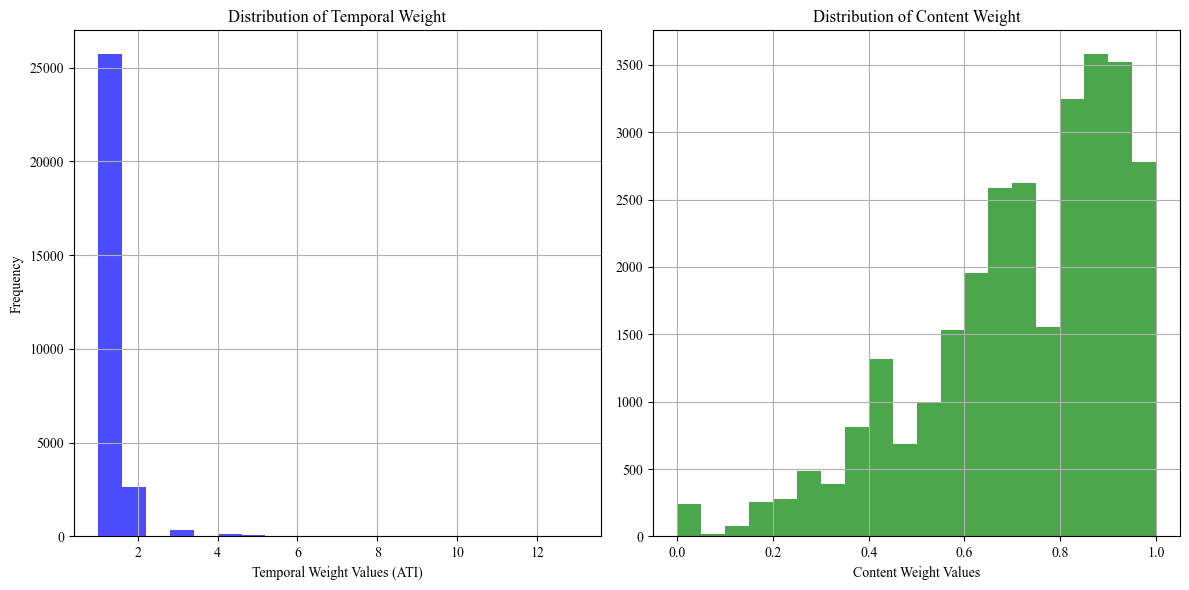

In [268]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df['T_Weight'].hist(bins=20, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribution of Temporal Weight')
axes[0].set_xlabel('Temporal Weight Values (ATI)')
axes[0].set_ylabel('Frequency')
df['Normalized_C_Weight'].hist(bins=20, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Distribution of Content Weight')
axes[1].set_xlabel('Content Weight Values')
plt.tight_layout()
plt.show()

In [38]:
df=pd.read_csv("AASnetworks.csv")
df

,topic,period,D,nn_GCC,L,C,Q,BC,edge_ratio,node_ratio
0,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",2.000000,4,1.333333,0.600000,1.000000,0.166667,1.000000,1.0
1,Pete Buttigieg,"('2013-11-09T06:38:28Z', '2014-05-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0
2,Pete Buttigieg,"('2014-11-09T06:38:28Z', '2015-05-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0
3,Pete Buttigieg,"('2015-05-09T06:38:28Z', '2015-11-09T06:38:28Z')",6.941176,17,1.955882,0.881166,1.657087,0.063725,1.000000,1.0
4,Pete Buttigieg,"('2016-05-09T06:38:28Z', '2016-11-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
834,Old Town Road,"('2021-03-27T20:36:43Z', '2021-09-27T20:36:43Z')",3.400000,10,1.711111,0.600000,2.623377,0.088889,1.000000,1.0
835,Old Town Road,"('2021-09-27T20:36:43Z', '2022-03-27T20:36:43Z')",2.857143,7,1.619048,0.625000,0.857843,0.123810,0.888889,1.0
836,Old Town Road,"('2022-03-27T20:36:43Z', '2022-09-27T20:36:43Z')",2.000000,4,1.333333,0.600000,NaN,0.166667,0.941176,1.0
837,Old Town Road,"('2022-09-27T20:36:43Z', '2023-03-27T20:36:43Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0


In [39]:
topic_to_category = {}

for topic in topics_politics:
    topic_to_category[topic] = 'Politics'
for topic in topics_conflicts:
    topic_to_category[topic] = 'Conflicts'
for topic in topics_disasters:
    topic_to_category[topic] = 'Disasters'
for topic in topics_tech:
    topic_to_category[topic] = 'Tech'
for topic in topics_ent:
    topic_to_category[topic] = 'Entertainment'
df['category'] = df['topic'].map(topic_to_category)

df[['start_period', 'end_period']] = df['period'].str.extract(r"\('([^']*)', '([^']*)'\)")
df['start_period'] = pd.to_datetime(df['start_period'])
df['end_period'] = pd.to_datetime(df['end_period'])

alpha5_data = df
df

,topic,period,D,nn_GCC,L,C,Q,BC,edge_ratio,node_ratio,category,start_period,end_period
0,Pete Buttigieg,"('2011-11-09T06:38:28Z', '2012-05-09T06:38:28Z')",2.000000,4,1.333333,0.600000,1.000000,0.166667,1.000000,1.0,Politics,2011-11-09 06:38:28+00:00,2012-05-09 06:38:28+00:00
1,Pete Buttigieg,"('2013-11-09T06:38:28Z', '2014-05-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Politics,2013-11-09 06:38:28+00:00,2014-05-09 06:38:28+00:00
2,Pete Buttigieg,"('2014-11-09T06:38:28Z', '2015-05-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Politics,2014-11-09 06:38:28+00:00,2015-05-09 06:38:28+00:00
3,Pete Buttigieg,"('2015-05-09T06:38:28Z', '2015-11-09T06:38:28Z')",6.941176,17,1.955882,0.881166,1.657087,0.063725,1.000000,1.0,Politics,2015-05-09 06:38:28+00:00,2015-11-09 06:38:28+00:00
4,Pete Buttigieg,"('2016-05-09T06:38:28Z', '2016-11-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Politics,2016-05-09 06:38:28+00:00,2016-11-09 06:38:28+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,Old Town Road,"('2021-03-27T20:36:43Z', '2021-09-27T20:36:43Z')",3.400000,10,1.711111,0.600000,2.623377,0.088889,1.000000,1.0,Entertainment,2021-03-27 20:36:43+00:00,2021-09-27 20:36:43+00:00
835,Old Town Road,"('2021-09-27T20:36:43Z', '2022-03-27T20:36:43Z')",2.857143,7,1.619048,0.625000,0.857843,0.123810,0.888889,1.0,Entertainment,2021-09-27 20:36:43+00:00,2022-03-27 20:36:43+00:00
836,Old Town Road,"('2022-03-27T20:36:43Z', '2022-09-27T20:36:43Z')",2.000000,4,1.333333,0.600000,NaN,0.166667,0.941176,1.0,Entertainment,2022-03-27 20:36:43+00:00,2022-09-27 20:36:43+00:00
837,Old Town Road,"('2022-09-27T20:36:43Z', '2023-03-27T20:36:43Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Entertainment,2022-09-27 20:36:43+00:00,2023-03-27 20:36:43+00:00


In [41]:
# df.to_csv('wikinetworks.csv', index=False)

Pete Buttigieg
max nn is 22
fifteen_percent_max is 4


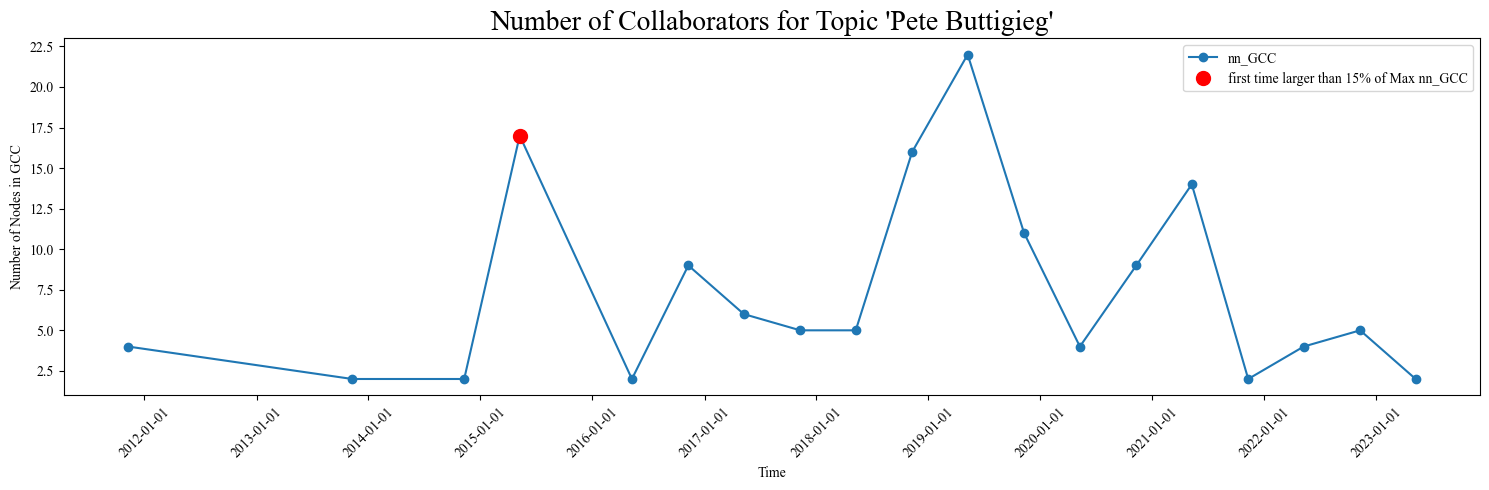

Sanna Marin
max nn is 25
fifteen_percent_max is 4


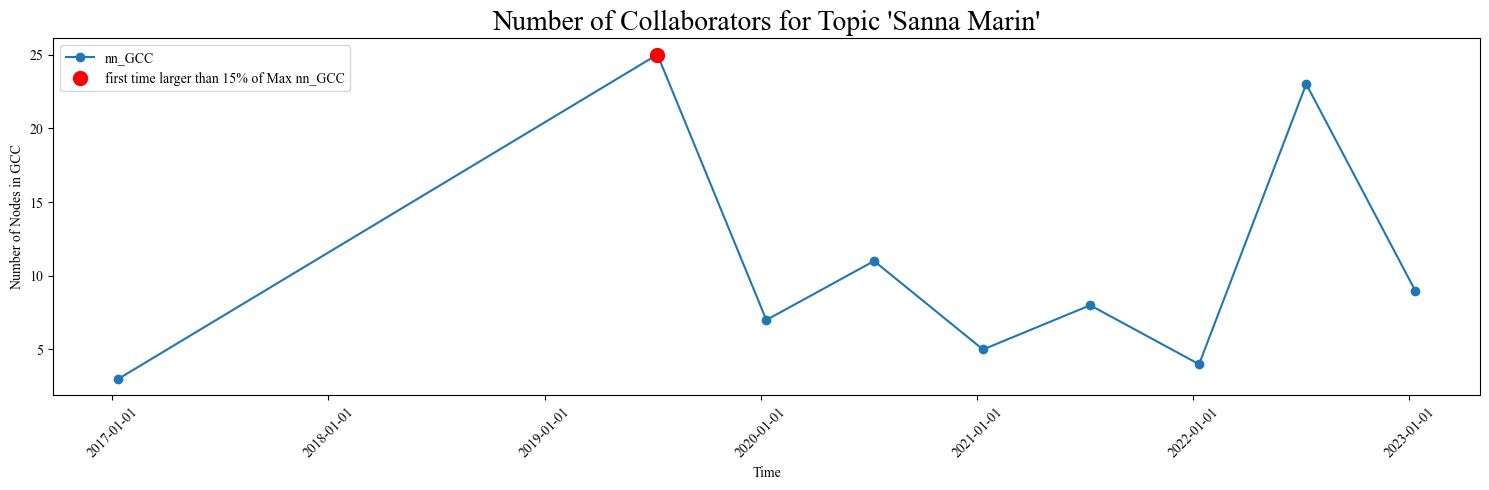

Emmanuel Macron
max nn is 18
fifteen_percent_max is 3


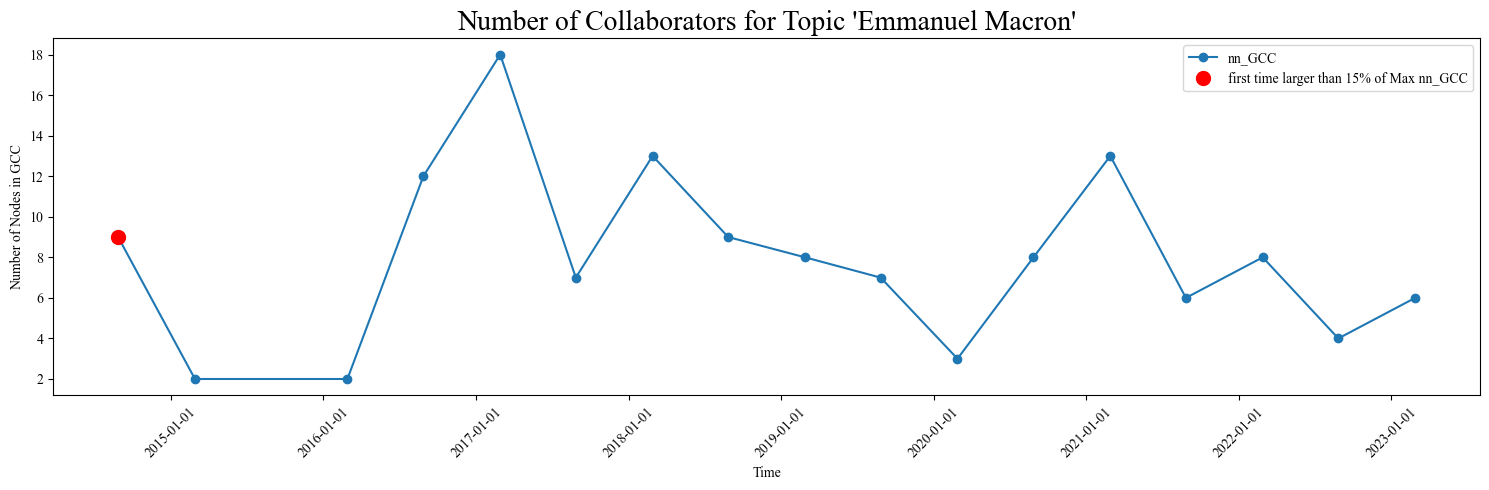

Abiy Ahmed
max nn is 18
fifteen_percent_max is 3


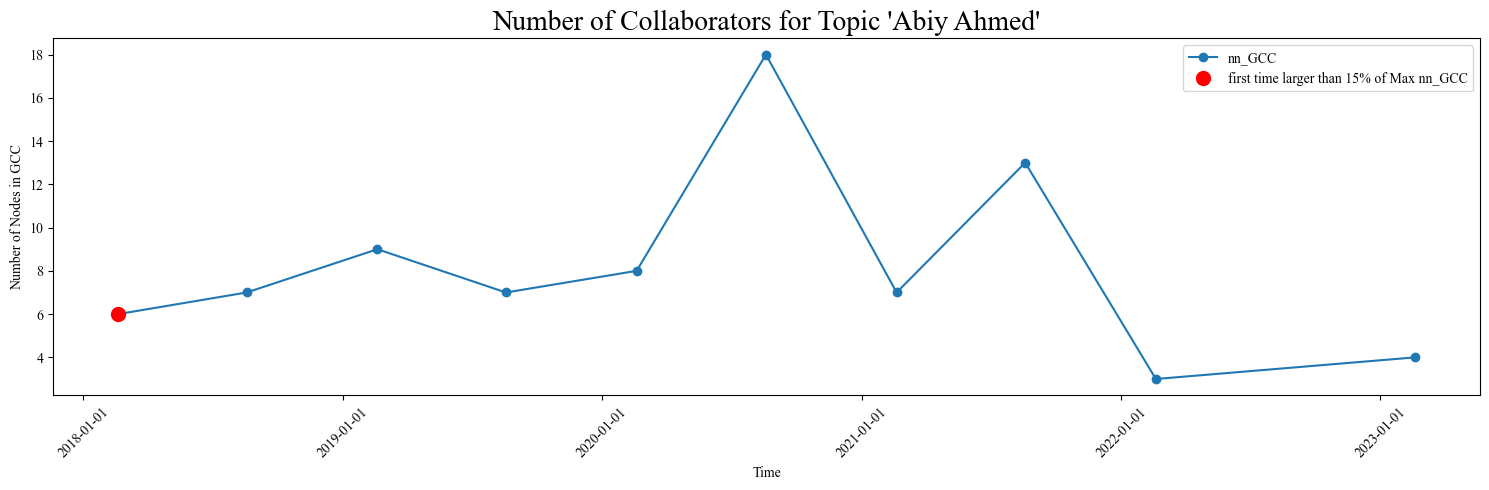

Ron DeSantis
max nn is 28
fifteen_percent_max is 5


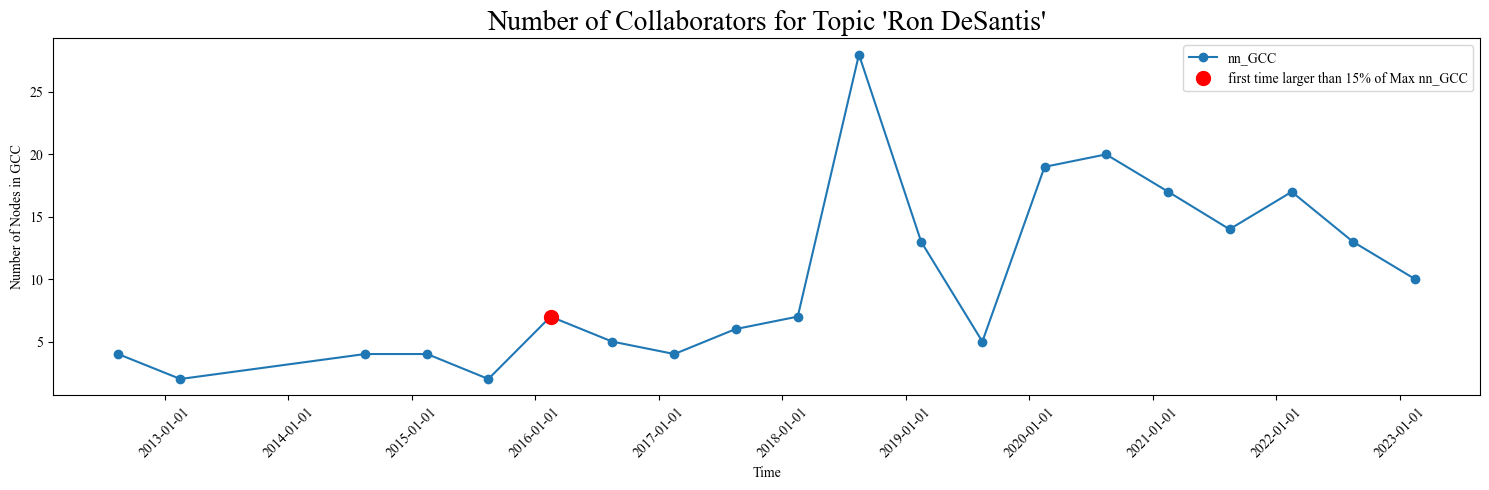

Alexandria Ocasio-Cortez
max nn is 25
fifteen_percent_max is 4


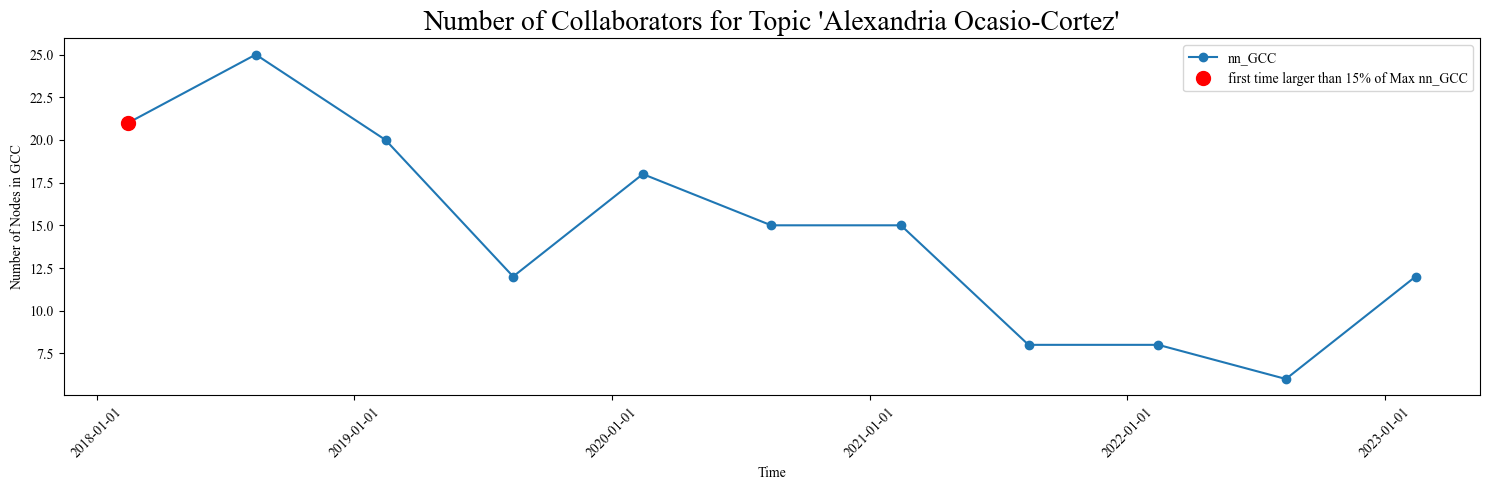

Jair Bolsonaro
max nn is 24
fifteen_percent_max is 4


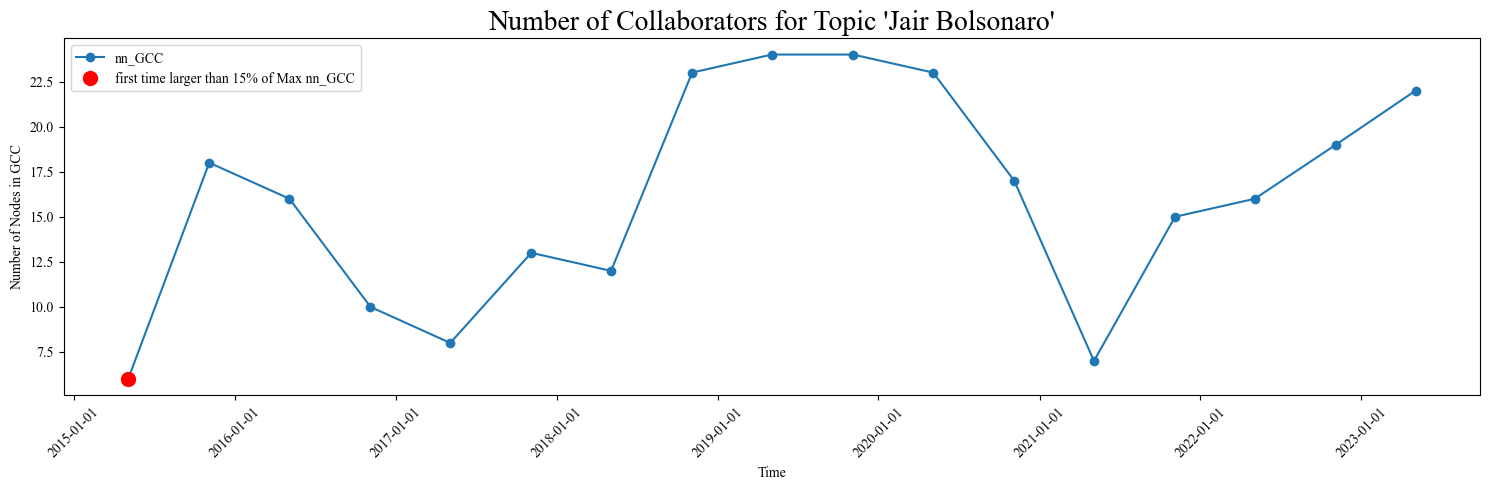

Volodymyr Zelenskyy
max nn is 14
fifteen_percent_max is 3


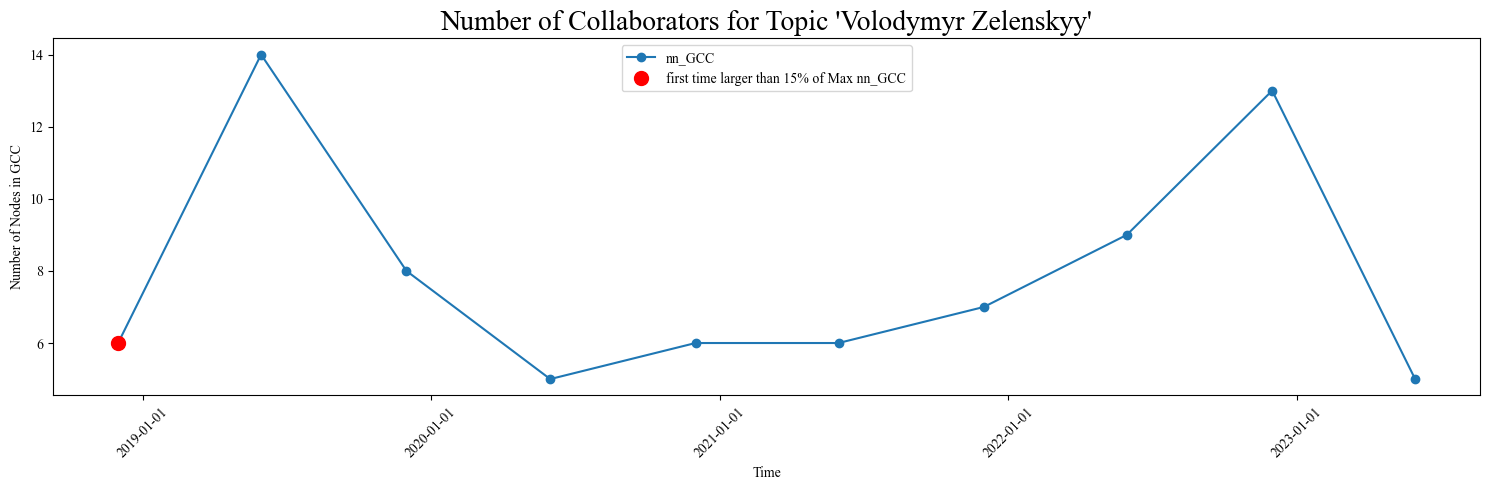

Brexit negotiations
max nn is 29
fifteen_percent_max is 5


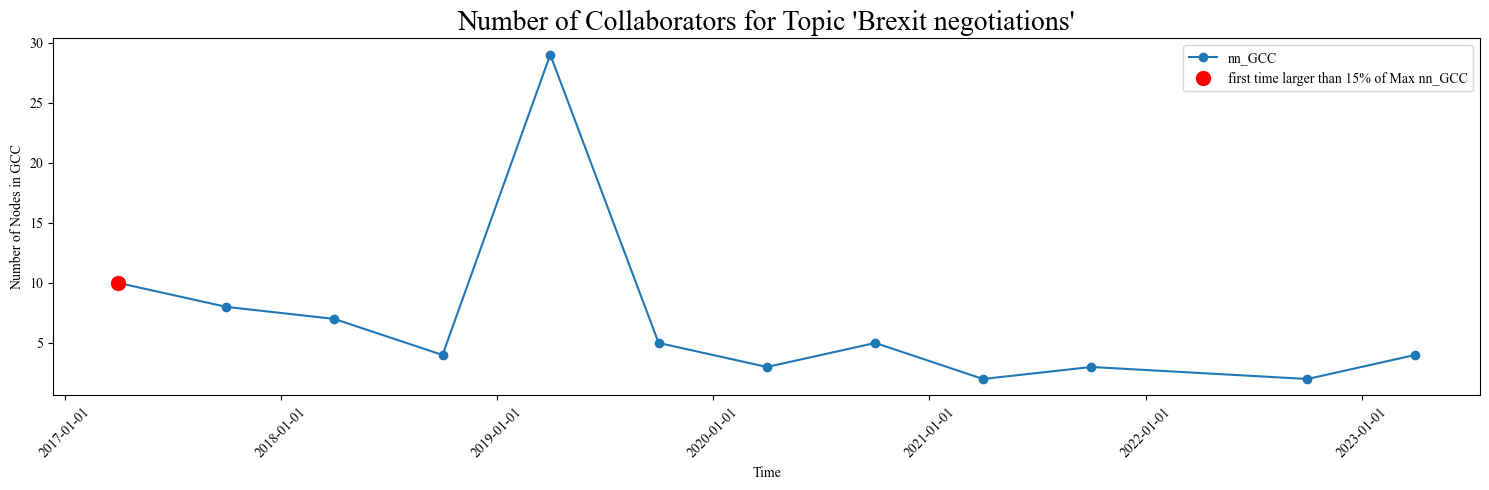

2020 Democratic Party presidential primaries
max nn is 21
fifteen_percent_max is 4


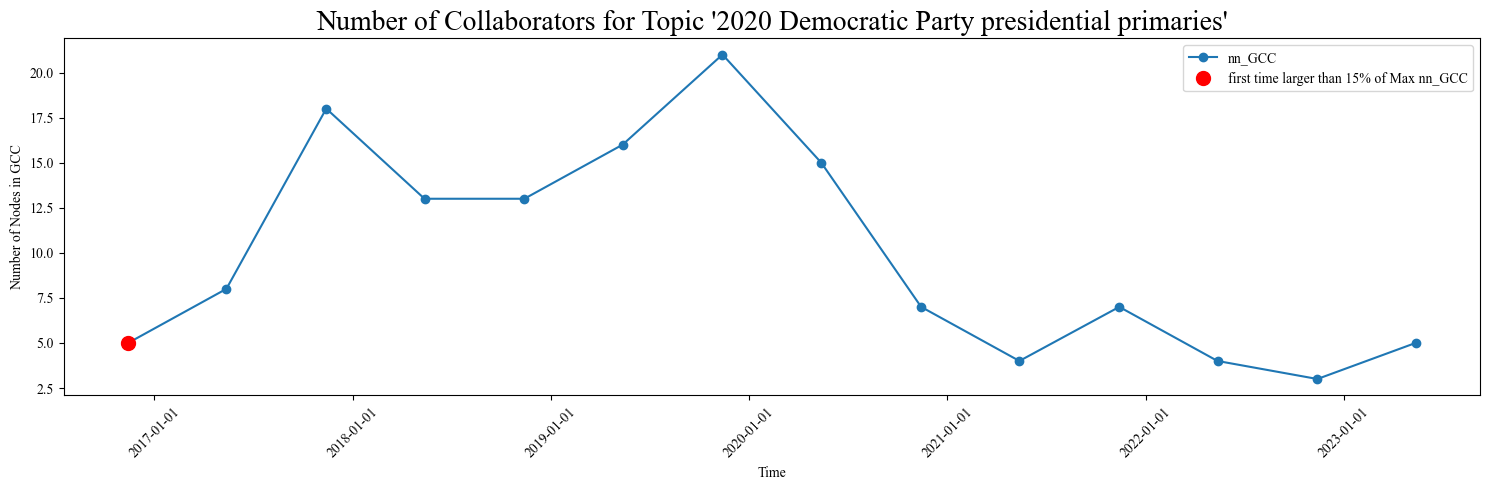

Jacinda Ardern
max nn is 29
fifteen_percent_max is 5


KeyboardInterrupt: 

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

def plot_topic_characteristics(dataframe, topic_name):
    print(topic_name)
    topic_data = dataframe[dataframe['topic'] == topic_name].sort_values(by='start_period')
 
    x_values = topic_data['start_period']
    print('max nn is', topic_data['nn_GCC'].max())

    fifteen_percent_max = math.ceil(0.15 * topic_data['nn_GCC'].max())
    print('fifteen_percent_max is', fifteen_percent_max)
    first_exceeds_index = topic_data[topic_data['nn_GCC'] > fifteen_percent_max].index.min()
 
    plt.figure(figsize=(15, 5))
    plt.plot(x_values, topic_data['nn_GCC'], '-o', label='nn_GCC')

    if not pd.isna(first_exceeds_index):
        # the point where nn_GCC first exceeds 15% of its maximum
        plt.plot(x_values.loc[first_exceeds_index], topic_data['nn_GCC'].loc[first_exceeds_index], 'ro', markersize=10, label='first time larger than 15% of Max nn_GCC')
    
    plt.legend()
    plt.title(f"Number of Collaborators for Topic '{topic_name}'", fontsize=20)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('Number of Nodes in GCC')
    plt.tight_layout()
    plt.show()

for topic in df['topic'].unique():
    plot_topic_characteristics(df, topic)

In [6]:
all_summary_data = []
unique_categories = alpha5_data['category'].unique()
summary_data = []

for category in unique_categories:
    category_data = alpha5_data[alpha5_data['category'] == category]

    num_unique_topics = category_data['topic'].nunique()
    min_start_period = category_data['start_period'].min()
    max_end_period = category_data['end_period'].max()
    min_edge_ratio = category_data['edge_ratio'].min()  
    max_edge_ratio = category_data['edge_ratio'].max()
    min_nodes = category_data['nn_GCC'].min()  
    max_nodes = category_data['nn_GCC'].max()
    number_of_networks = len(category_data) 
    summary_data.append([category, num_unique_topics, number_of_networks, min_start_period, max_end_period, min_edge_ratio, max_edge_ratio, min_nodes, max_nodes])

all_summary_data.extend(summary_data)
all_summary_df = pd.DataFrame(all_summary_data, columns=['Category', '#Topics', '#Networks', 'Min Start Date', 'Max End Date', 'Min edge ratio', 'Max edge ratio', 'Min #Nodes', 'Max #Nodes'])
all_summary_df

,Category,#Topics,#Networks,Min Start Date,Max End Date,Min edge ratio,Max edge ratio,Min #Nodes,Max #Nodes
0,Politics,12,168,2009-05-28 00:18:34+00:00,2023-11-30 22:57:44+00:00,0.500000,1.0,2,29
1,Conflicts,12,155,2014-03-01 23:01:38+00:00,2023-12-23 17:07:20+00:00,0.713235,1.0,2,27
2,Disasters,14,145,2009-10-25 21:51:24+00:00,2023-12-10 21:02:50+00:00,0.666667,1.0,2,27
3,Tech,12,192,2010-01-03 08:46:49+00:00,2023-11-02 21:03:38+00:00,0.500000,1.0,2,31
4,Entertainment,13,179,2010-06-03 00:19:30+00:00,2023-12-18 13:54:27+00:00,0.500000,1.0,2,36


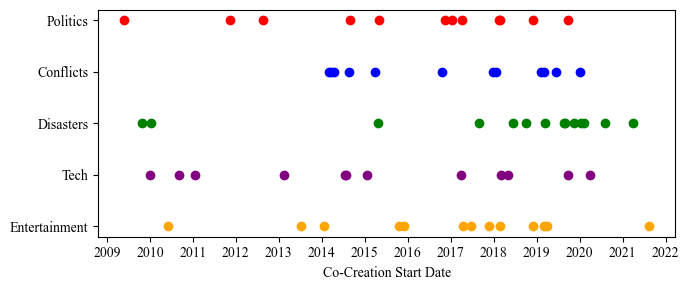

In [11]:
alpha5_data=df


plt.figure(figsize=(7,3))
categories = alpha5_data['category'].unique()
categories = ['Entertainment', 'Tech', 'Disasters', 'Conflicts', 'Politics']
category_positions = {category: idx for idx, category in enumerate(categories)}

categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}


for category, color in categories_colors.items():
    category_data = alpha5_data[alpha5_data['category'] == category]
    unique_topics = category_data.groupby('topic')['start_period'].min().reset_index()
    plt.scatter(unique_topics['start_period'], [category_positions[category]] * len(unique_topics), color=color, label=category)

plt.yticks(list(category_positions.values()), list(category_positions.keys()))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Co-Creation Start Date')
plt.tight_layout()
plt.show()

# Filtering only after the network gets as 15% big as the max 

In [12]:
alpha_data=df

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 10))
all_filtered_df = pd.DataFrame()
for topic in alpha_data['topic'].unique():
    topic_indices = alpha_data[alpha_data['topic'] == topic].index
    alpha_data.loc[topic_indices, 'normalized_nn_GCC'] = scaler.fit_transform(alpha_data.loc[topic_indices, 'nn_GCC'].values.reshape(-1, 1))

filtered_data = []


for topic in alpha_data['topic'].unique():
    topic_data = alpha_data[alpha_data['topic'] == topic].sort_values(by='start_period')
    start_index = topic_data[topic_data['normalized_nn_GCC'] > 1.5].index.min()

    if start_index is not np.nan: 
        filtered_data.append(topic_data.loc[start_index:])
alpha_filtered_df = pd.concat(filtered_data)
alpha_filtered_df

,topic,period,D,nn_GCC,L,C,Q,BC,edge_ratio,node_ratio,category,start_period,end_period,normalized_nn_GCC
3,Pete Buttigieg,"('2015-05-09T06:38:28Z', '2015-11-09T06:38:28Z')",6.941176,17,1.955882,0.881166,1.657087,0.063725,1.000000,1.0,Politics,2015-05-09 06:38:28+00:00,2015-11-09 06:38:28+00:00,7.500000
4,Pete Buttigieg,"('2016-05-09T06:38:28Z', '2016-11-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Politics,2016-05-09 06:38:28+00:00,2016-11-09 06:38:28+00:00,0.000000
5,Pete Buttigieg,"('2016-11-09T06:38:28Z', '2017-05-09T06:38:28Z')",4.222222,9,1.472222,0.708333,2.357770,0.067460,1.000000,1.0,Politics,2016-11-09 06:38:28+00:00,2017-05-09 06:38:28+00:00,3.500000
6,Pete Buttigieg,"('2017-05-09T06:38:28Z', '2017-11-09T06:38:28Z')",3.666667,6,1.266667,0.882353,1.302521,0.066667,1.000000,1.0,Politics,2017-05-09 06:38:28+00:00,2017-11-09 06:38:28+00:00,2.000000
7,Pete Buttigieg,"('2017-11-09T06:38:28Z', '2018-05-09T06:38:28Z')",2.800000,5,1.300000,0.800000,1.244444,0.100000,1.000000,1.0,Politics,2017-11-09 06:38:28+00:00,2018-05-09 06:38:28+00:00,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,Old Town Road,"('2021-03-27T20:36:43Z', '2021-09-27T20:36:43Z')",3.400000,10,1.711111,0.600000,2.623377,0.088889,1.000000,1.0,Entertainment,2021-03-27 20:36:43+00:00,2021-09-27 20:36:43+00:00,4.705882
835,Old Town Road,"('2021-09-27T20:36:43Z', '2022-03-27T20:36:43Z')",2.857143,7,1.619048,0.625000,0.857843,0.123810,0.888889,1.0,Entertainment,2021-09-27 20:36:43+00:00,2022-03-27 20:36:43+00:00,2.941176
836,Old Town Road,"('2022-03-27T20:36:43Z', '2022-09-27T20:36:43Z')",2.000000,4,1.333333,0.600000,NaN,0.166667,0.941176,1.0,Entertainment,2022-03-27 20:36:43+00:00,2022-09-27 20:36:43+00:00,1.176471
837,Old Town Road,"('2022-09-27T20:36:43Z', '2023-03-27T20:36:43Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Entertainment,2022-09-27 20:36:43+00:00,2023-03-27 20:36:43+00:00,0.000000


In [14]:
df = df[alpha5_data['nn_GCC'] > 3]
df= alpha_filtered_df
alpha_data=df
alpha5_data=df

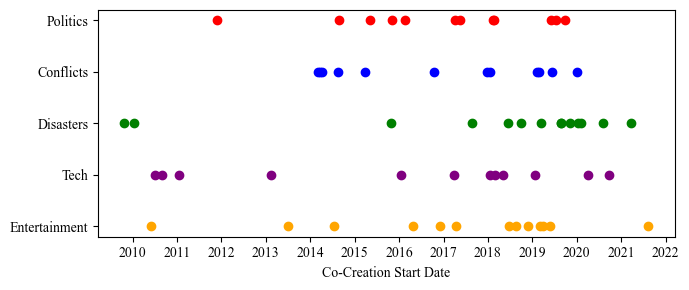

In [15]:
plt.figure(figsize=(7,3))

categories = alpha5_data['category'].unique()
categories = ['Entertainment', 'Tech', 'Disasters', 'Conflicts', 'Politics']
category_positions = {category: idx for idx, category in enumerate(categories)}

categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}

for category, color in categories_colors.items():
    category_data = alpha5_data[alpha5_data['category'] == category]
    unique_topics = category_data.groupby('topic')['start_period'].min().reset_index()
    plt.scatter(unique_topics['start_period'], [category_positions[category]] * len(unique_topics), color=color, label=category)

plt.yticks(list(category_positions.values()), list(category_positions.keys()))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Co-Creation Start Date')
plt.tight_layout()
plt.show()

In [16]:
all_summary_data = []
unique_categories = alpha5_data['category'].unique()

summary_data = []
for category in unique_categories:
    category_data = alpha5_data[alpha5_data['category'] == category]
    num_unique_topics = category_data['topic'].nunique()
    min_start_period = category_data['start_period'].min()
    max_end_period = category_data['end_period'].max()
    min_edge_ratio = category_data['edge_ratio'].min()  
    max_edge_ratio = category_data['edge_ratio'].max()
    min_nodes = category_data['nn_GCC'].min()  
    max_nodes = category_data['nn_GCC'].max()
    number_of_networks = len(category_data)  
    summary_data.append([category, num_unique_topics, number_of_networks, min_start_period, max_end_period, min_edge_ratio, max_edge_ratio, min_nodes, max_nodes])

all_summary_data.extend(summary_data)
all_summary_df = pd.DataFrame(all_summary_data, columns=['Category', '#Unique Topics', '#Networks', 'Min Start Date', 'Max End Date', 'Min edge ratio', 'Max edge ratio', 'Min #Nodes (GCC)', 'Max #Nodes (GCC)'])
all_summary_df

,Category,#Unique Topics,#Networks,Min Start Date,Max End Date,Min edge ratio,Max edge ratio,Min #Nodes (GCC),Max #Nodes (GCC)
0,Politics,12,135,2011-11-28 00:18:34+00:00,2023-11-30 22:57:44+00:00,0.717391,1.0,4,29
1,Conflicts,12,126,2014-03-01 23:01:38+00:00,2023-12-23 17:07:20+00:00,0.713235,1.0,4,27
2,Disasters,13,87,2009-10-25 21:51:24+00:00,2023-10-25 06:59:42+00:00,0.688889,1.0,4,27
3,Tech,12,137,2010-07-03 08:46:49+00:00,2023-11-02 21:03:38+00:00,0.625000,1.0,4,31
4,Entertainment,13,166,2010-06-03 00:19:30+00:00,2023-12-18 13:54:27+00:00,0.600000,1.0,4,36


# add column "age"

In [16]:
df['start_period'] = pd.to_datetime(df['start_period'])
min_start_per_topic = df.groupby(['topic'])['start_period'].transform('min')
df['age'] = (df['start_period'] - min_start_per_topic).dt.days
df['age'] = df['age'].apply(lambda x: round(x / 30))
df

,topic,period,D,nn_GCC,L,C,Q,BC,edge_ratio,node_ratio,category,start_period,end_period,normalized_nn_GCC,age
3,Pete Buttigieg,"('2015-05-09T06:38:28Z', '2015-11-09T06:38:28Z')",6.941176,17,1.955882,0.881166,1.657087,0.063725,1.000000,1.0,Politics,2015-05-09 06:38:28+00:00,2015-11-09 06:38:28+00:00,7.500000,0
4,Pete Buttigieg,"('2016-05-09T06:38:28Z', '2016-11-09T06:38:28Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Politics,2016-05-09 06:38:28+00:00,2016-11-09 06:38:28+00:00,0.000000,12
5,Pete Buttigieg,"('2016-11-09T06:38:28Z', '2017-05-09T06:38:28Z')",4.222222,9,1.472222,0.708333,2.357770,0.067460,1.000000,1.0,Politics,2016-11-09 06:38:28+00:00,2017-05-09 06:38:28+00:00,3.500000,18
6,Pete Buttigieg,"('2017-05-09T06:38:28Z', '2017-11-09T06:38:28Z')",3.666667,6,1.266667,0.882353,1.302521,0.066667,1.000000,1.0,Politics,2017-05-09 06:38:28+00:00,2017-11-09 06:38:28+00:00,2.000000,24
7,Pete Buttigieg,"('2017-11-09T06:38:28Z', '2018-05-09T06:38:28Z')",2.800000,5,1.300000,0.800000,1.244444,0.100000,1.000000,1.0,Politics,2017-11-09 06:38:28+00:00,2018-05-09 06:38:28+00:00,1.500000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,Old Town Road,"('2021-03-27T20:36:43Z', '2021-09-27T20:36:43Z')",3.400000,10,1.711111,0.600000,2.623377,0.088889,1.000000,1.0,Entertainment,2021-03-27 20:36:43+00:00,2021-09-27 20:36:43+00:00,4.705882,24
835,Old Town Road,"('2021-09-27T20:36:43Z', '2022-03-27T20:36:43Z')",2.857143,7,1.619048,0.625000,0.857843,0.123810,0.888889,1.0,Entertainment,2021-09-27 20:36:43+00:00,2022-03-27 20:36:43+00:00,2.941176,30
836,Old Town Road,"('2022-03-27T20:36:43Z', '2022-09-27T20:36:43Z')",2.000000,4,1.333333,0.600000,NaN,0.166667,0.941176,1.0,Entertainment,2022-03-27 20:36:43+00:00,2022-09-27 20:36:43+00:00,1.176471,37
837,Old Town Road,"('2022-09-27T20:36:43Z', '2023-03-27T20:36:43Z')",1.000000,2,1.000000,0.000000,NaN,0.000000,1.000000,1.0,Entertainment,2022-09-27 20:36:43+00:00,2023-03-27 20:36:43+00:00,0.000000,43


In [17]:
category_mapping = {'Politics': 1, 'Conflicts': 2, 'Disasters': 3, 'Tech': 4, 'Entertainment': 5}
df['category_encoded'] = df['category'].map(category_mapping)

In [18]:
df['D'] = pd.to_numeric(df['D'], errors='coerce')
df['L'] = pd.to_numeric(df['L'], errors='coerce')
df['C'] = pd.to_numeric(df['C'], errors='coerce')
df['BC'] = pd.to_numeric(df['BC'], errors='coerce')
df['nn_GCC'] = pd.to_numeric(df['nn_GCC'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# characteristics distributions

In [1]:
# def plot_characteristic_distribution(dataframe):
#     characteristics = ['D', 'L', 'C', 'BC', 'nn_GCC', 'age']  
#     categories_colors = {
#         'Politics': 'red',
#         'Conflicts': 'blue',
#         'Disasters': 'green',
#         'Tech': 'purple',
#         'Entertainment': 'orange'
#     }

#     # Create 3x2 subplots for the 5 characteristics
#     fig, axes = plt.subplots(3, 2, figsize=(12, 9))  # Adjusted for 5 characteristics
#     axes = axes.flatten()  # Flatten the axes array for easier indexing
    
#     for i, char in enumerate(characteristics):
#         for category, color in categories_colors.items():
#             category_data = dataframe[dataframe['category'] == category]
#             sns.kdeplot(category_data[char], ax=axes[i], color=color, label=category, shade=True)
#             axes[i].set_title(f"Distribution of {char} per Category")
#             axes[i].legend()
            
#             # Set the x-axis to start from 0 for all subplots
#             axes[i].set_xlim(left=0)
    
#     # Hide the last subplot if there is an odd number of characteristics
#     if len(characteristics) % 2 != 0:
#         axes[-1].set_visible(False)
    
#     # Adjust layout and display the plots
#     plt.tight_layout()
#     plt.show()
# plot_characteristic_distribution(alpha5_data)

In [20]:
columns_of_interest = ['nn_GCC', 'age', 'D', 'L', 'C', 'BC', 'edge_ratio']
stats = alpha5_data[columns_of_interest].describe()
stats = stats.round(3)
stats

,nn_GCC,age,D,L,C,BC,edge_ratio
count,651.000,651.000,651.000,651.000,651.000,651.000,651.000
mean,11.538,42.711,4.677,1.704,0.616,0.095,0.968
std,6.320,35.296,3.892,0.441,0.244,0.066,0.076
min,4.000,0.000,1.500,1.000,0.000,0.000,0.600
25%,6.000,12.000,2.686,1.393,0.462,0.050,1.000
50%,10.000,37.000,3.385,1.667,0.628,0.087,1.000
75%,15.000,61.000,5.000,1.956,0.789,0.127,1.000
max,36.000,158.000,35.000,4.512,1.000,0.333,1.000


# Main Results

In [2]:
categories = {
    'Politics': topics_politics,
    'Conflicts': topics_conflicts,
    'Disasters': topics_disasters,
    'Tech': topics_tech,
    'Entertainment': topics_ent
}
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}


topic_to_category = {}
for category, topics in categories.items():
    for topic in topics:
        topic_to_category[topic] = category


alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)
filtered_df=alpha5_data
filtered_df = alpha5_data[alpha5_data['nn_GCC'] > 3]
filtered_df = filtered_df[filtered_df['nn_GCC'] <36]

# Define full names for the characteristics
characteristic_full_names = {
    'L': 'Average Shortest Path Length (L)',
    'C': 'Clustering Coefficient (C)',
    'BC': 'Centralization (BC)',
    'D': 'Average Degree (D)'
}

characteristics = ['D',  'C','L', 'BC']  

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten() 
for i, char in enumerate(characteristics):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        axes[i].scatter(category_data['nn_GCC'], category_data[char], color=color, label=category, alpha=0.10)

        if not category_data.empty:
            z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
            axes[i].plot(x, p(x), color=color)

    axes[i].set_xlabel('Team Size', fontsize=16)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=16)
    axes[i].legend(fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [3]:
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}

categories_markers = {
    'Politics': 'o',  # Circle
    'Conflicts': 's',  # Square
    'Disasters': '^',  # Triangle Up
    'Tech': 'D',  # Diamond
    'Entertainment': 'P'  # Plus (filled)
}

# Create a new column 'category' in the dataframe for easier filtering
alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)

# Filter the dataframe based on nn_GCC and other characteristics
filtered_df = alpha5_data[(alpha5_data['nn_GCC'] > 3) & (alpha5_data['nn_GCC'] < 40) & (alpha5_data['L'] < 4)]

# Define full names for the characteristics
characteristic_full_names = {
    'D': 'Average Degree (D)',
    'C': 'Clustering Coefficient (C)',
    'L': 'Average Shortest Path Length (L)',
    'BC': 'Centralization (BC)',
    
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  
axes = axes.flatten()  
for i, char in enumerate(characteristic_full_names.keys()):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        
        # Fit a second-order polynomial and plot the regression line with markers
        if not category_data.empty:
            z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
            # Use category-specific color and a common line style
            marker = categories_markers.get(category, 'o')  # Default to 'o' if category not found
#             axes[i].plot(x, p(x), linestyle='--', color=color, marker=marker, label=category, markevery=int(len(x)/10))  # markevery to reduce marker density
            axes[i].plot(x, p(x),  color=color, label=category, markevery=int(len(x)/10))  # markevery to reduce marker density

    # Set labels and titles for each subplot
    axes[i].set_xlabel('Team Size', fontsize=14)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=14)
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [4]:
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}
categories_markers = {
    'Politics': 'o',  # Circle
    'Conflicts': 's',  # Square
    'Disasters': '^',  # Triangle Up
    'Tech': 'D',  # Diamond
    'Entertainment': 'P'  # Plus (filled)
}

# Create a new column 'category' in the dataframe for easier filtering
alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)

# Filter the dataframe based on nn_GCC and other characteristics
filtered_df = alpha5_data[(alpha5_data['nn_GCC'] > 3) & (alpha5_data['nn_GCC'] < 40) & (alpha5_data['L'] < 4)]

# Define full names for the characteristics
characteristic_full_names = {
    'D': 'Average Degree (D)',
    'C': 'Clustering Coefficient (C)',
    'L': 'Average Shortest Path Length (L)',
    'BC': 'Centralization (BC)',
}

# Create separate plots for each characteristic
for char, char_full_name in characteristic_full_names.items():
    plt.figure(figsize=(6, 5.5), dpi=700)
    
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        
        if not category_data.empty:
            z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
            marker = categories_markers.get(category, 'o')
            plt.plot(x, p(x), linestyle=line_style, color=color, label=category, markevery=int(len(x)/10))
    
    plt.xlabel('Team Size', fontsize=14)
    plt.ylabel(char_full_name, fontsize=14)
#     plt.xticks(fontsize=12 * 2)  # Double the fontsize
#     plt.yticks(fontsize=12 * 2)  # Double the fontsize
    plt.legend()
    plt.grid(True)
#     plt.title(f'Regression of {char_full_name} by Team Size', fontsize=16)
    plt.show()

In [5]:
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}

categories_markers = {
    'Politics': 'o',  # Circle
    'Conflicts': 's',  # Square
    'Disasters': '^',  # Triangle Up
    'Tech': 'D',  # Diamond
    'Entertainment': 'P'  # Plus (filled)
}

# Additionally, define unique line styles for each category
categories_line_styles = {
    'Politics': '--',  # Dashed
  'Conflicts': '-.',  # Dash-dot
    'Disasters': ':',  # Dotted
    'Tech': (0, (3, 1, 1, 1)),  # Custom dash pattern
    'Entertainment': (0, (3, 5, 1, 5))  # Custom dash pattern
}

# Create a new column 'category' in the dataframe for easier filtering
alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)

# Filter the dataframe based on nn_GCC and other characteristics
filtered_df = alpha5_data[(alpha5_data['nn_GCC'] > 3) & (alpha5_data['nn_GCC'] < 40) & (alpha5_data['L'] < 4)]

# Define full names for the characteristics
characteristic_full_names = {
    'D': 'Average Degree (D)',
    'C': 'Clustering Coefficient (C)',
    'L': 'Average Shortest Path Length (L)',
    'BC': 'Centralization (BC)'
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop over each characteristic
for i, char in enumerate(characteristic_full_names.keys()):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        
        # Fit a second-order polynomial and plot the regression line with larger markers
        if not category_data.empty:
            z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
            # Use category-specific color, line style, and marker
            line_style = categories_line_styles.get(category, '--')  # Default to dashed if category not found
            marker = categories_markers.get(category, 'o')  # Default to 'o' if category not found
            axes[i].plot(x, p(x), linestyle=line_style, color=color, marker=marker, markersize=8, label=category, markevery=int(len(x)/10))  # Increased markersize

    # Set labels and titles for each subplot
    axes[i].set_xlabel('Number of Editors', fontsize=14)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=14)
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [6]:
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}

topic_to_category = {}
for category, topics in categories.items():
    for topic in topics:
        topic_to_category[topic] = category

# Create a new column 'category' in the dataframe for easier filtering
alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)

filtered_df = alpha5_data[alpha5_data['nn_GCC'] >3]

# Define full names for the characteristics
characteristic_full_names = {
    'L': 'Average Shortest Path Length (L)',
    'C': 'Clustering Coefficient (C)',
    'BC': 'Centralization (BC)',
    'D': 'Average Degree (D)'
}

# List of characteristics to plot
characteristics = ['D', 'C', 'L', 'BC']  

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop over each characteristic
for i, char in enumerate(characteristics):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        axes[i].scatter(category_data['age'], category_data[char], color=color, label=category, alpha=0.1)
        
        # Fit a second-order polynomial and plot the regression line
        if not category_data.empty:
            z = np.polyfit(category_data['age'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['age'].min(), category_data['age'].max(), 100)
            axes[i].plot(x, p(x), color=color)

    # Set labels and titles for each subplot
    axes[i].set_xlabel("Artifact's Age (Month)", fontsize=16)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=16)
    axes[i].legend(fontsize=14)
    axes[i].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [7]:
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}
categories_markers = {
    'Politics': 'o',  # Circle
    'Conflicts': 's',  # Square
    'Disasters': '^',  # Triangle Up
    'Tech': 'D',  # Diamond
    'Entertainment': 'P'  # Plus (filled)
}
categories_line_styles = {
    'Politics': '--',  # Dashed
    'Conflicts': '-.',  # Dash-dot
    'Disasters': ':',  # Dotted
    'Tech': (0, (3, 1, 1, 1)),  # Custom dash pattern
    'Entertainment': (0, (3, 5, 1, 5))  # Custom dash pattern
}

# Create a new column 'category' in the dataframe for easier filtering
alpha5_data['category'] = alpha5_data['topic'].map(topic_to_category)

# Filter the dataframe based on nn_GCC and other characteristics
filtered_df = alpha5_data[(alpha5_data['nn_GCC'] > 3) & (alpha5_data['nn_GCC'] < 36) & (alpha5_data['L'] < 4)]

# Define full names for the characteristics
characteristic_full_names = {
    'D': 'Average Degree (D)',
    'C': 'Clustering Coefficient (C)',
    'L': 'Average Shortest Path Length (L)',
    'BC': 'Centralization (BC)'
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=700)  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

Loop over each characteristic
for i, char in enumerate(characteristic_full_names.keys()):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]
        
        # Fit a second-order polynomial and plot the regression line with larger markers
        if not category_data.empty:
            z = np.polyfit(category_data['age'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['age'].min(), category_data['age'].max(), 100)
            # Use category-specific color, line style, and marker
            line_style = categories_line_styles.get(category, '--')  # Default to dashed if category not found
            marker = categories_markers.get(category, 'o')  # Default to 'o' if category not found
#             axes[i].plot(x, p(x), linestyle=line_style, color=color, marker=marker, markersize=8, label=category, markevery=int(len(x)/10))  # Increased markersize
            axes[i].plot(x, p(x), color=color, markersize=8, label=category, markevery=int(len(x)/10))  # Increased markersize

    # Set labels and titles for each subplot
    axes[i].set_xlabel("Artifact's Age (Month)", fontsize=14)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=14)
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define your categories and colors (assuming these dictionaries are already defined)
categories_colors = {
    'Politics': 'red',
    'Conflicts': 'blue',
    'Disasters': 'green',
    'Tech': 'purple',
    'Entertainment': 'orange'
}

# Define full names for the characteristics
characteristic_full_names = {
    'L': 'Average Shortest Path Length (L)',
    'C': 'Clustering Coefficient (C)',
    'BC': 'Centralization (BC)',
    'D': 'Average Degree (D)'
}

# List of characteristics to plot
characteristics = ['D', 'L', 'C', 'BC']

# Loop through each unique value of alpha
for alpha in df['alpha'].unique():
    print(f"Plotting for alpha = {alpha}")

    # Filter the DataFrame for the current alpha
    alpha_df = df[df['alpha'] == alpha]

    # Additional filtering steps as per your existing code
    filtered_df = alpha_df[alpha_df['nn_GCC'] > 5]
    filtered_df = filtered_df[filtered_df['nn_GCC'] <= 35]

    # Create subplots for each characteristic
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop over each characteristic
    for i, char in enumerate(characteristics):
        for category, color in categories_colors.items():
            category_data = filtered_df[filtered_df['category'] == category]
            axes[i].scatter(category_data['nn_GCC'], category_data[char], color=color, label=category, alpha=0.5)
            
            # Fit a second-order polynomial and plot the regression line
            if not category_data.empty:
                z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
                p = np.poly1d(z)
                x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
                axes[i].plot(x, p(x), color=color, linestyle='--')

        # Set labels and titles for each subplot
        axes[i].set_xlabel('Number of Editors', fontsize=14)
        axes[i].set_ylabel(characteristic_full_names[char], fontsize=14)
        axes[i].legend()
        axes[i].grid(True)

    # Adjust layout and show plot
    plt.suptitle(f"Characteristics for alpha = {alpha}")
    plt.tight_layout()
    plt.show()


In [8]:
filtered_df = df

# Further filtering based on nn_GCC
filtered_df = filtered_df[(filtered_df['nn_GCC'] > 5) & (filtered_df['nn_GCC'] <= 35)]

# Create subplots for each characteristic
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

characteristics = ['D', 'C', 'L', 'BC']  # Characteristics to plot

for i, char in enumerate(characteristics):
    for category, color in categories_colors.items():
        category_data = filtered_df[filtered_df['category'] == category]

        # Fit a second-order polynomial and plot the regression line
        if not category_data.empty:
            z = np.polyfit(category_data['nn_GCC'], category_data[char], 2)
            p = np.poly1d(z)
            x = np.linspace(category_data['nn_GCC'].min(), category_data['nn_GCC'].max(), 100)
            axes[i].plot(x, p(x), color=color, label=category)

    axes[i].set_xlabel('Number of Editors', fontsize=12)
    axes[i].set_ylabel(characteristic_full_names[char], fontsize=12)
    axes[i].legend()

plt.show()

In [23]:
df = df[df['nn_GCC'] > 4] 

In [18]:
characteristic_full_names = {
    'L': 'Average Shortest Path Length',
    'C': 'Clustering Coefficient',
    'BC': 'Centralization',
    'D': 'Average Degree'
}

# Regression Models

In [293]:
filtered_df=alpha5_data

In [294]:
def add_quadratic_terms(df, variables):
    for var in variables:
        df[f"{var}^2"] = df[var] ** 2
def run_regression(df, independent_vars, dependent_var):
    X = df[independent_vars]  # Independent variables
    y = df[dependent_var]     # Dependent variable
    X = sm.add_constant(X)    
    model = sm.OLS(y, X).fit()

    p_values = model.pvalues
    return {
        'nn_GCCp-value': model.pvalues.get('nn_GCC', None),
#         'age p-value': model.pvalues.get('age', None),
        'nn_GCC^2p-value': model.pvalues.get('nn_GCC^2', None),
#         'age^2 p-value': model.pvalues.get('age^2', None),
        
        'nn_GCCcoef': model.params.get('nn_GCC', None),
#         'age coef': model.params.get('age', None),
        'nn_GCC^2coef': model.params.get('nn_GCC^2', None),
#         'age^2 coef': model.params.get('age^2', None),
        
        'Prob(F-statistic)': model.f_pvalue,
        'Adj.R-squared': model.rsquared_adj
    }


add_quadratic_terms(filtered_df, ['nn_GCC'])
independent_vars = ['nn_GCC', 'nn_GCC^2']
network_chars = ['D', 'C', 'L', 'BC']

categories = filtered_df['category'].unique()
regression_results = pd.DataFrame(columns=['Characteristic', 'Category', 'nn_GCCp-value', 
                                           'nn_GCC^2p-value', 'Prob(F-statistic)', 'Adj.R-squared'])
for category in categories:
    category_df = filtered_df[filtered_df['category'] == category]
    for char in network_chars:
        results = run_regression(category_df, independent_vars, char)
        results['Characteristic'] = char
        results['Category'] = category
        results_df = pd.DataFrame([results])
        regression_results = pd.concat([regression_results, results_df], ignore_index=True)

regression_results

C:\Users\negin\AppData\Local\Temp\ipykernel_25300\3213952094.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regression_results = pd.concat([regression_results, results_df], ignore_index=True)


,Characteristic,Category,nn_GCCp-value,nn_GCC^2p-value,Prob(F-statistic),Adj.R-squared,nn_GCCcoef,nn_GCC^2coef
0,D,Politics,3.436269e-01,1.748802e-05,1.077842e-25,0.548747,-0.138756,0.023602
1,C,Politics,4.831588e-03,7.499440e-02,4.697971e-05,0.118718,0.036781,-0.000838
2,L,Politics,8.615140e-15,1.482853e-11,7.355487e-16,0.379234,0.144404,-0.004443
3,BC,Politics,7.077881e-01,1.443672e-01,2.694353e-04,0.096769,0.001278,-0.000182
4,D,Conflicts,2.014644e-04,7.675055e-01,9.466939e-23,0.480135,0.406224,-0.001326
5,C,Conflicts,1.574539e-05,1.462339e-03,4.850294e-07,0.163251,0.065624,-0.002002
6,L,Conflicts,4.484135e-11,5.393159e-06,2.022320e-17,0.389034,0.124103,-0.003462
7,BC,Conflicts,3.026239e-01,6.889926e-02,1.089544e-02,0.045334,0.004391,-0.000327
8,D,Disasters,1.556397e-02,4.299862e-01,2.434611e-21,0.482720,0.314670,0.004185
9,C,Disasters,2.127433e-05,2.051490e-03,1.754055e-07,0.186631,0.074912,-0.002201


In [295]:
def check_significance(p_value):
    if p_value < 0.05:
        return 'Significant' if p_value < 0.01 else 'Marginally Significant'
    else:
        return 'Non-Significant'

def format_p_value(p_value):
    if p_value < 0.001:
        return '<< 0.001'
    else:
        return f'{p_value:.3f}'  # Rounds the p-value to three decimal places

# Applying functions to create new columns
regression_results['nn_GCCcheck'] = regression_results['nn_GCCp-value'].apply(check_significance)
regression_results['nn_GCC^2check'] = regression_results['nn_GCC^2p-value'].apply(check_significance)

# Adding columns for rounded p-values
regression_results['nn_GCCRop-value'] = regression_results['nn_GCCp-value'].apply(format_p_value)
regression_results['nn_GCC^2Rop-value'] = regression_results['nn_GCC^2p-value'].apply(format_p_value)


regression_results=regression_results.groupby('Characteristic').apply(lambda x: x).reset_index(drop=True)

# Specify the new column order
new_column_order = ['Characteristic', 'Category',
                    'nn_GCCRop-value', 'nn_GCC^2Rop-value', 'Prob(F-statistic)', 'Adj.R-squared']

# Reindex the DataFrame with the new column order
regression_results = regression_results[new_column_order]

columns_to_round = ['Prob(F-statistic)', 'Adj.R-squared']

# Rounding the values in the specified columns to three decimals
for column in columns_to_round:
    regression_results[column] = regression_results[column].round(3)
# Displaying the updated DataFrame
regression_results

,Characteristic,Category,nn_GCCRop-value,nn_GCC^2Rop-value,Prob(F-statistic),Adj.R-squared
0,BC,Politics,0.708,0.144,0.000,0.097
1,BC,Conflicts,0.303,0.069,0.011,0.045
2,BC,Disasters,0.018,0.008,0.023,0.039
3,BC,Tech,0.427,0.178,0.119,0.013
4,BC,Entertainment,0.010,0.464,0.000,0.239
5,C,Politics,0.005,0.075,0.000,0.119
6,C,Conflicts,<< 0.001,0.001,0.000,0.163
7,C,Disasters,<< 0.001,0.002,0.000,0.187
8,C,Tech,<< 0.001,0.016,0.000,0.084
9,C,Entertainment,0.806,0.345,0.000,0.102


In [296]:
filtered_df = alpha5_data[alpha5_data['nn_GCC'] > 3]

In [297]:
import statsmodels.api as sm
import pandas as pd

# Function to add quadratic terms to the DataFrame
def add_quadratic_terms(df, variables):
    for var in variables:
        df[f"{var}^2"] = df[var] ** 2

# Define the regression function and return desired results
def run_regression(df, independent_vars, dependent_var):
    X = df[independent_vars]  # Independent variables
    y = df[dependent_var]     # Dependent variable
    X = sm.add_constant(X)    # Add a constant to the model (intercept)
    model = sm.OLS(y, X).fit()

    # Extracting required statistics
    p_values = model.pvalues
    return {
#         'nn_GCC p-value': model.pvalues.get('nn_GCC', None),
        'agep-value': model.pvalues.get('age', None),
#         'nn_GCC^2 p-value': model.pvalues.get('nn_GCC^2', None),
        'age^2p-value': model.pvalues.get('age^2', None),
        
#         'nn_GCC coef': model.params.get('nn_GCC', None),
        'agecoef': model.params.get('age', None),
#         'nn_GCC^2 coef': model.params.get('nn_GCC^2', None),
        'age^2coef': model.params.get('age^2', None),
        
        'Prob(F-statistic)': model.f_pvalue,
        'Adj.R-squared': model.rsquared_adj
    }


# Filter the DataFrame for a specific alpha value
# alpha5_data = df[df['alpha'] == .5]

# Add quadratic terms to the DataFrame
add_quadratic_terms(filtered_df, ['age'])

# Update the list of independent variables to include the quadratic terms
independent_vars = [ 'age', 'age^2']

# List of network characteristics
network_chars = ['D', 'C', 'L', 'BC']

# Get unique categories
categories = filtered_df['category'].unique()

# Create an empty DataFrame to store results
regression_results = pd.DataFrame(columns=['Characteristic', 'Category',  'agep-value', 
                                           'age^2p-value', 'Prob(F-statistic)', 'Adj.R-squared'])

# Loop through each category and run regressions
for category in categories:
    category_df = filtered_df[filtered_df['category'] == category]
    for char in network_chars:
        results = run_regression(category_df, independent_vars, char)
        results['Characteristic'] = char
        results['Category'] = category
        # Convert results to a DataFrame and append
        results_df = pd.DataFrame([results])
        regression_results = pd.concat([regression_results, results_df], ignore_index=True)

regression_results

C:\Users\negin\AppData\Local\Temp\ipykernel_25300\3976950137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}^2"] = df[var] ** 2
C:\Users\negin\AppData\Local\Temp\ipykernel_25300\3976950137.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regression_results = pd.concat([regression_results, results_df], ignore_index=True)


,Characteristic,Category,agep-value,age^2p-value,Prob(F-statistic),Adj.R-squared,agecoef,age^2coef
0,D,Politics,6.887389e-02,6.860700e-02,1.806396e-01,0.011171,-0.067482,0.000571
1,C,Politics,1.354746e-01,2.920603e-01,1.857085e-01,0.010744,-0.002697,0.000016
2,L,Politics,8.433417e-01,8.465157e-01,5.129541e-01,-0.005086,0.000678,0.000006
3,BC,Politics,6.901270e-01,8.015003e-01,8.609912e-01,-0.013253,0.000208,-0.000001
4,D,Conflicts,2.161543e-09,4.364129e-07,6.423887e-10,0.279659,-0.163424,0.001302
5,C,Conflicts,1.847751e-04,1.667613e-03,2.650591e-04,0.111110,-0.008801,0.000071
6,L,Conflicts,1.681475e-02,1.657532e-02,5.304524e-02,0.031126,0.009747,-0.000094
7,BC,Conflicts,2.189924e-04,2.487476e-03,1.986185e-04,0.115271,0.002461,-0.000019
8,D,Disasters,5.483632e-04,2.857756e-03,1.416181e-03,0.124233,-0.139787,0.000968
9,C,Disasters,5.378640e-03,3.646837e-03,1.424331e-02,0.074753,-0.007519,0.000064
